### Question 1
#### 1.1 Use the requests module (or urllib) to use the Entrez API (see slides 5) to identify the PubMed IDs for 1000 Alzheimers papers from 2022 and for 1000 cancer papers from 2022. (9 points)

Note: To search for a disease and a publication year, structure the term like: Alzheimers+AND+2022[pdat] (Here [pdat] indicates that this is a publication year, and the AND (has to be all caps) means both conditions should apply.) 

In [1]:
import time
import json
import requests
import xml.dom.minidom as m
import xml.etree.ElementTree as ET

In [8]:
# the pubmed ids for 1000 Alzheimers papers from 2022
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&retmode=json&retmax=1000&2022&term="
r1 = requests.get(base_url + 'Alzheimer')
pubmed1 = r1.json()['esearchresult']['idlist']
pubmed1


['36309183',
 '36309087',
 '36308033',
 '36306920',
 '36306735',
 '36306540',
 '36306459',
 '36306458',
 '36306386',
 '36305541',
 '36305459',
 '36305148',
 '36305125',
 '36304998',
 '36304823',
 '36304723',
 '36304124',
 '36303331',
 '36302977',
 '36302665',
 '36302659',
 '36302488',
 '36302464',
 '36301043',
 '36299613',
 '36299608',
 '36298279',
 '36297317',
 '36297313',
 '36296980',
 '36296969',
 '36296692',
 '36296686',
 '36296677',
 '36296574',
 '36296397',
 '36295605',
 '36295535',
 '36295014',
 '36294010',
 '36293946',
 '36293666',
 '36293539',
 '36293528',
 '36293516',
 '36293327',
 '36293221',
 '36293147',
 '36293049',
 '36292947',
 '36292945',
 '36292933',
 '36292931',
 '36292674',
 '36292623',
 '36292114',
 '36291714',
 '36291679',
 '36291666',
 '36291661',
 '36291639',
 '36291618',
 '36291595',
 '36291553',
 '36291536',
 '36291224',
 '36291125',
 '36291068',
 '36291020',
 '36291017',
 '36290612',
 '36290138',
 '36289878',
 '36289859',
 '36289565',
 '36289458',
 '36289390',

In [9]:
r2 = requests.get(base_url + "cancer")
pubmed2 = r2.json()['esearchresult']['idlist']
pubmed2

['36309424',
 '36309418',
 '36309416',
 '36309415',
 '36309414',
 '36309413',
 '36309406',
 '36309401',
 '36309400',
 '36309397',
 '36309395',
 '36309391',
 '36309388',
 '36309387',
 '36309385',
 '36309384',
 '36309383',
 '36309382',
 '36309376',
 '36309374',
 '36309371',
 '36309370',
 '36309369',
 '36309368',
 '36309366',
 '36309364',
 '36309362',
 '36309357',
 '36309356',
 '36309355',
 '36309354',
 '36309352',
 '36309349',
 '36309329',
 '36309321',
 '36309296',
 '36309224',
 '36309223',
 '36309222',
 '36309209',
 '36309208',
 '36309204',
 '36309201',
 '36309200',
 '36309195',
 '36309193',
 '36309184',
 '36309154',
 '36309152',
 '36309135',
 '36309131',
 '36309124',
 '36309122',
 '36309110',
 '36309105',
 '36309104',
 '36309102',
 '36309101',
 '36309096',
 '36309086',
 '36309082',
 '36309080',
 '36309079',
 '36309077',
 '36309076',
 '36309075',
 '36309074',
 '36309073',
 '36309072',
 '36309066',
 '36309037',
 '36309036',
 '36309018',
 '36309017',
 '36309008',
 '36308932',
 '36308926',

#### 1.2 Use the Entrez API via requests/urllib to pull the metadata for each such paper found above (both cancer and Alzheimers) (and save a JSON file storing each paper's title, abstract, and the query that found it that is of the general form: (12 points) 

Here 32008517 would be the PubMed ID of one of the 2000 papers, specifically one that came from searching for Alzheimer's papers (it won't be in your data set because it was published in 2019). You should include the full AbstractText; I'm abridging here for clarity.

In [10]:
metadata = dict()


In [11]:
def find_text_by_node(element):
    text = ""
    for child in element.childNodes:
        while child.nodeValue is None:
            child = child.childNodes[0]
        text += child.nodeValue
    return text
  

In [30]:
for i in range(0, len(pubmed1), 250): 
    
    pmids = pubmed1[i:i+250]

    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&retmode=xml&id="
    url = base_url + "[" + ",".join(pmids) + "]"
    r = requests.post(url)
    doc = m.parseString(r.text)

    for j, id in enumerate(doc.getElementsByTagName("PubmedArticle")):
      pmid = pmids[j]
      title_nodes = id.getElementsByTagName("ArticleTitle")
      title = find_text_by_node(title_nodes[0])
      abstract_nodes = id.getElementsByTagName("AbstractText")
      abstract = []
      for node in abstract_nodes:
        abstract += [find_text_by_node(node)]
      abstract = " ".join(abstract)
      metadata[pmid] = {"ArticleTitle": title, 
                      "AbstractText": abstract, 
                      "query": 'Alzheimers'}
    time.sleep(1)

In [31]:
for i in range(0, len(pubmed2), 250): 
    
    pmids = pubmed2[i:i+250]

    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&retmode=xml&id="
    url = base_url + "[" + ",".join(pmids) + "]"
    r = requests.post(url)
    doc = m.parseString(r.text)

    for j, id in enumerate(doc.getElementsByTagName("PubmedArticle")):
      pmid = pmids[j]
      title_nodes = id.getElementsByTagName("ArticleTitle")
      title = find_text_by_node(title_nodes[0])
      abstract_nodes = id.getElementsByTagName("AbstractText")
      abstract = []
      for node in abstract_nodes:
        abstract += [find_text_by_node(node)]
      abstract = " ".join(abstract)
      metadata[pmid] = {"ArticleTitle": title, 
                      "AbstractText": abstract, 
                      "query": 'Cancer'}
    time.sleep(1)

In [32]:
with open("metadata.json", "w") as f:
    json.dump(metadata, f)

#### 1.3 There are of course many more papers of each category, but is there any overlap in the two sets of papers that you identified? (3 points)

In [35]:
len(metadata)

2000

In [37]:
print(len(pubmed1), len(pubmed2))

1000 1000


Given the created metada, which is a dictionary with no overlapping pubmed, still contains 2000 articles, we can conclude that there is no overlap in the two sets of papers identified.

#### 1.4 Hint: Some papers like 32008517 have multiple AbstractText fields (e.g. when the abstract is structured). Be sure to store all parts. You could do this in many ways, from using a dictionary or a list or simply concatenating with a space in between. Discuss any pros or cons of your choice in your readme (1 point).

In [40]:
metadata['36302712']

{'ArticleTitle': 'Spatiotemporally Controlled Formation and Rotation of Magnetic Nanochain In Vivo for Precise Mechanotherapy of Tumor.',
 'AbstractText': 'Systemic cancer therapy is always accompanied with toxicity to normal tissues, which prompts concerted efforts to develop precise cancer therapy strategy. Herein, we firstly develop an intriguing approach that enables spatiotemporally controlled formation and rotation of magnetic nanochains in vivo, allowing for precise mechanotherapy of tumor with minimal side effects. The building blocks of the nanochain are hybrid nanocomposites of pheophorbide-A (PP) modified iron oxide nanoparticles (IONPs) and lanthanide-doped down-conversion nanoparticles (DCNPs). By applying permanent magnetic field, the nanocomposites would be aligned to form nanochain. Next, MnO 2 NPs were subsequently administrated to accumulate in tumors as supplier of Mn 2+ , which effectively coordinates with the PP located at the joint the nanocomposite to immobilize 

I used a string to store all the abstract text(joined by placing a space in between). This way there's no way to modify the text. one disadvantage of storing text all in string is we lost information of which section these text belong to. 

### Question 2
Machine learning and data visualization strategies generally work best on data that is numeric, but exercise 1 gave us text data, and indeed text is common. Fortunately, modern NLP algorithms powered by machine learning trained on massive datasets exist that can take words (e.g. word2vec) or titles and abstracts (e.g. SPECTER) and return a vector of numbers in a way that similar items are given similar vectors. Since we have titles and abstracts, let's use SPECTER.

#### 2.1 In particular, for each paper identified from exercise 1, compute the SPECTER embedding (a 768-dimensional vector). Keep track of which papers came from searching for Alzheimers, which came from searching for cancer. (5 points) 

If you are familiar with SPECTER and wish to do it another way, that's great, if not here's one approach based on https://github.com/allenai/specter:

In [1]:
from transformers import AutoTokenizer, AutoModel

# load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('allenai/specter')
model = AutoModel.from_pretrained('allenai/specter')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]


Moving 0 files to the new cache system


Downloading: 100%|██████████| 440M/440M [00:15<00:00, 27.9MB/s] 
c:\Users\qiuxi\Anaconda3_2\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\qiuxi\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


#### 2.2 Load the papers dictionary (3 points) and then process your dictionary of papers to find the SPECTER embeddings (2 points). One (somewhat slow) way to do this is as follows:

In [8]:
f = open('metadata.json',)
papers = json.load(f)
f.close()

In [11]:
import tqdm

# we can use a persistent dictionary (via shelve) so we can stop and restart if needed
# alternatively, do the same but with embeddings starting as an empty dictionary
embeddings = {}
for pmid, paper in tqdm.tqdm(papers.items()):
    data = [paper["ArticleTitle"] + tokenizer.sep_token + "".join(paper["AbstractText"])]
    inputs = tokenizer(
        data, padding=True, truncation=True, return_tensors="pt", max_length=512
    )
    result = model(**inputs)
    # take the first token in the batch as the embedding
    embeddings[pmid] = result.last_hidden_state[:, 0, :].detach().numpy()[0]

# turn our dictionary into a list
embeddings = [embeddings[pmid] for pmid in papers.keys()]

100%|██████████| 2000/2000 [28:39<00:00,  1.16it/s]


#### 2.3 PCA to identify three principal components

In [12]:
import pandas as pd

In [13]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
embeddings_pca = pd.DataFrame(
    pca.fit_transform(embeddings),
    columns=['PC0', 'PC1', 'PC2']
)
embeddings_pca["query"] = [paper["query"] for paper in papers.values()]

c:\Users\qiuxi\Anaconda3_2\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\Users\qiuxi\Anaconda3_2\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=T

#### 2.4 Plot 2D scatter plots for PC0 vs PC1, PC0 vs PC2, and PC1 vs PC2; color code these by the search query used (Alzheimers vs cancer). (5 points) 

In [14]:
embeddings_pca.head()

,PC0,PC1,PC2,query
0,-3.717505,-5.514046,1.158621,Alzheimers
1,3.700094,-2.111677,-2.168458,Cancer
2,6.957951,-3.963187,1.261070,Cancer
3,-3.646195,5.681671,3.769900,Alzheimers
4,-1.851811,8.216564,3.893292,Alzheimers


In [20]:
len(embeddings_pca)

2000

In [1]:
import matplotlib.pyplot as plt

In [27]:
colors = ['blue','green']

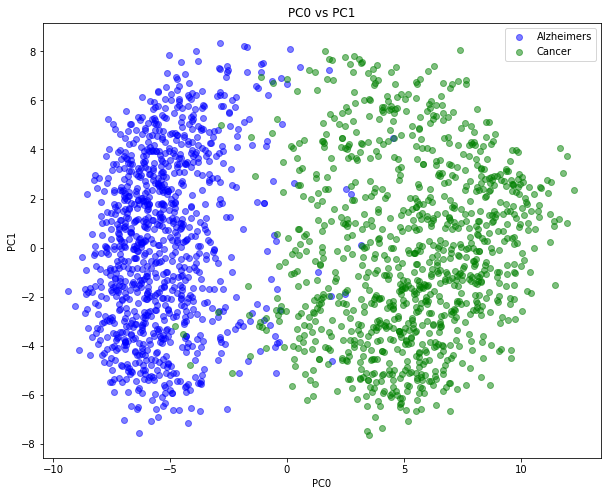

In [25]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
xa_p0 = embeddings_pca[embeddings_pca['query']=='Alzheimers']['PC0']
ya_p1 = embeddings_pca[embeddings_pca['query']=='Alzheimers']['PC1']
ax1.scatter(xa_p0,ya_p1,c= colors[0],label = 'Alzheimers',alpha =0.5)
xc_p0 = embeddings_pca[embeddings_pca['query']=='Cancer']['PC0']
yc_p1 = embeddings_pca[embeddings_pca['query']=='Cancer']['PC1']
ax1.scatter(xc_p0,yc_p1,c= colors[1],label = 'Cancer',alpha =0.5)
ax1.legend()
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("PC0 vs PC1")
plt.show()

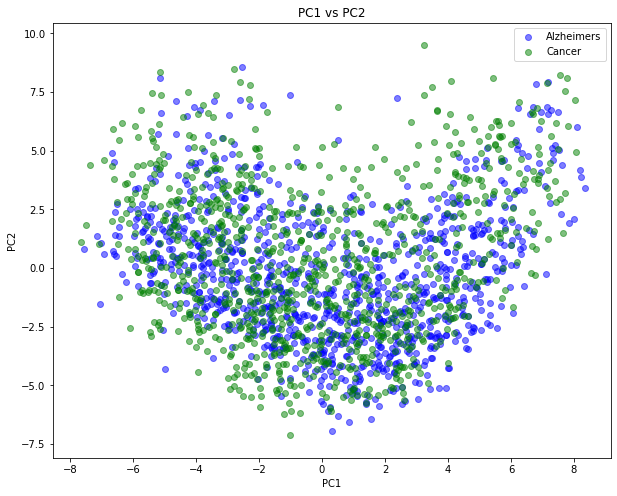

In [26]:
fig2, ax2 = plt.subplots(figsize=(10, 8))
xa_p1 = embeddings_pca[embeddings_pca['query']=='Alzheimers']['PC1']
ya_p2 = embeddings_pca[embeddings_pca['query']=='Alzheimers']['PC2']
ax2.scatter(xa_p1,ya_p2,c= colors[0],label = 'Alzheimers',alpha =0.5)
xc_p1 = embeddings_pca[embeddings_pca['query']=='Cancer']['PC1']
yc_p2 = embeddings_pca[embeddings_pca['query']=='Cancer']['PC2']
ax2.scatter(xc_p1,yc_p2,c= colors[1],label = 'Cancer',alpha =0.5)
ax2.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 vs PC2")
plt.show()

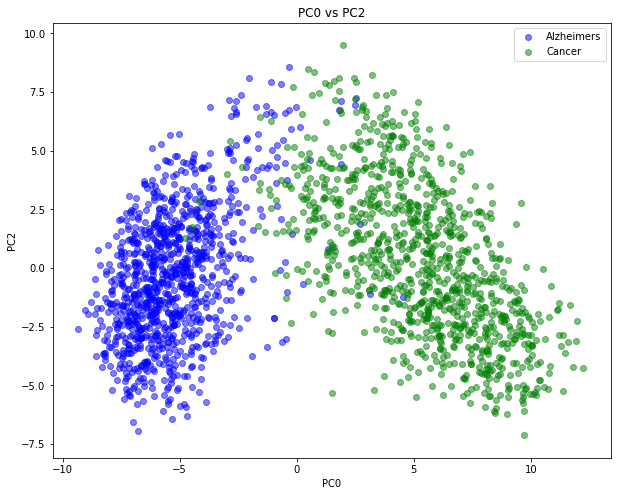

In [28]:
fig3, ax3 = plt.subplots(figsize=(10, 8))
xa_p0 = embeddings_pca[embeddings_pca['query']=='Alzheimers']['PC0']
ya_p2 = embeddings_pca[embeddings_pca['query']=='Alzheimers']['PC2']
ax3.scatter(xa_p0,ya_p2,c= colors[0],label = 'Alzheimers',alpha =0.5)
xc_p0 = embeddings_pca[embeddings_pca['query']=='Cancer']['PC0']
yc_p2 = embeddings_pca[embeddings_pca['query']=='Cancer']['PC2']
ax3.scatter(xc_p0,yc_p2,c= colors[1],label = 'Cancer',alpha =0.5)
ax3.legend()
plt.xlabel("PC0")
plt.ylabel("PC2")
plt.title("PC0 vs PC2")
plt.show()

#### 2.5 Comment on the separation or lack thereof, and any take-aways from that. (5 points)

The plotted 2D scatterplots show that PC0 explained the highest variance in spector embeddings, with the rest of the PCs explaining less of the variance. This shows that: 1) Alzheimer's disease and Cancer's research papers does exists differences that are great enough for PCA to separate them; 2) Spector embeddings are embeddings applicable to research paper given it is PCA separable; 3) most of the variances are captured in the first principal component, with rest of the component explaing much less variance. 

### Question 3

#### 3.1 Write a Python function that uses the Explicit Euler method to plot  i(t)given  and s(0) i(0), r(0),beta, gamma, and Tmax (the last time point to compute). (N follows from the formula.) Do not use an integration library; provide your own implementation (5 points).

In [2]:
def plot_it(s0,i0,r0,b,g,Tmax):
  N = s0 + i0 + r0
  si = [s0]
  ii = [i0]
  ti = [0]
  for i in range(0,Tmax):
    ds = -b/N*si[i]*ii[i] 
    di = b/N*si[i]*ii[i] - g*ii[i]
    si.append(si[i] + ds)
    ii.append(ii[i] + di) 
    ti.append(ti[i] + 1)
  
  plt.scatter(ti,ii)
  plt.xlabel('ti')
  plt.ylabel('ii')
  plt.title('i(t)')
  plt.show()




#### 3.2 The New Haven population is approximately N= 134000. Suppose that on day 0, there was 1 person infected with a new disease in New Haven and everyone else was susceptible (as the disease is new). Suppose further that beta = 2 and gamma = 1. Plot the time course of the number of infected individuals until that number drops below 1 (at which point, we'll assume the disease has run its course).

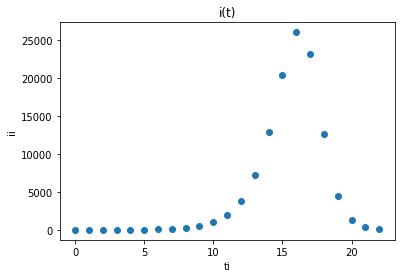

In [39]:
plot_it(134000-1, 1, 0, 2, 1, 22)

It takes about 20 time steps/days for the infected number to drop below 1.

#### 3.3 For those parameter values, when does the number of infected people peak? (2 points) 

The number of infected person peaks at time of 16 day

#### 3.4 How many people are infected at the peak? (3 points). (Have your code identify these things; don't do it manually.)
26033.39152123727

Codes shown below:

In [3]:
def show_max_it(s0,i0,r0,b,g,Tmax):
  N = s0 + i0 + r0
  si = [s0]
  ii = [i0]
  ti = [0]
  for i in range(0,Tmax):
    ds = -b/N*si[i]*ii[i] 
    di = b/N*si[i]*ii[i] - g*ii[i]
    si.append(si[i] + ds)
    ii.append(ii[i] + di) 
    ti.append(ti[i] + 1)
  
  print('max susceptible population is ' + str(max(ii)))
  print('susceptible population peak at day ' + str(ii.index(max(ii))))




In [54]:
show_max_it(134000-1, 1, 0, 2, 1, 22)

max susceptible population is 26033.39152123727
susceptible population peak at day 16


#### 3.5 Unfortunately, for new diseases, we may not know beta or gamma with much accuracy. Vary these two variables over "nearby" values, and plot on a heat map how the time of the peak of the infection depends on these two variables. (5 points). 

In [4]:
def show_peak_t(s0,i0,r0,b,g,Tmax):
  N = s0 + i0 + r0
  si = [s0]
  ii = [i0]
  ti = [0]
  for i in range(0,Tmax):
    ds = -b/N*si[i]*ii[i] 
    di = b/N*si[i]*ii[i] - g*ii[i]
    si.append(si[i] + ds)
    ii.append(ii[i] + di) 
    ti.append(ti[i] + 1)
  return ii.index(max(ii))



In [5]:
import numpy as np

In [6]:
betas = [1.5,1.6,1.7,1.8,1.9,2.0,2.1]
gammas = [0.5,0.6,0.7,0.8,0.9,1.0,1.1]
zeros_array = np.zeros((len(betas), len(gammas)))

In [7]:
for i in range(len(betas)):
  for j in range(len(gammas)):
    zeros_array[i,j] = show_peak_t(134000-1, 1, 0, betas[i], gammas[j], 22)

In [8]:
zeros_array

array([[17., 18., 19., 21., 22., 22., 22.],
       [16., 17., 18., 19., 21., 22., 22.],
       [15., 16., 17., 18., 19., 20., 22.],
       [15., 15., 16., 17., 18., 19., 20.],
       [14., 14., 15., 16., 16., 17., 18.],
       [13., 14., 14., 15., 15., 16., 17.],
       [13., 13., 14., 14., 15., 15., 16.]])

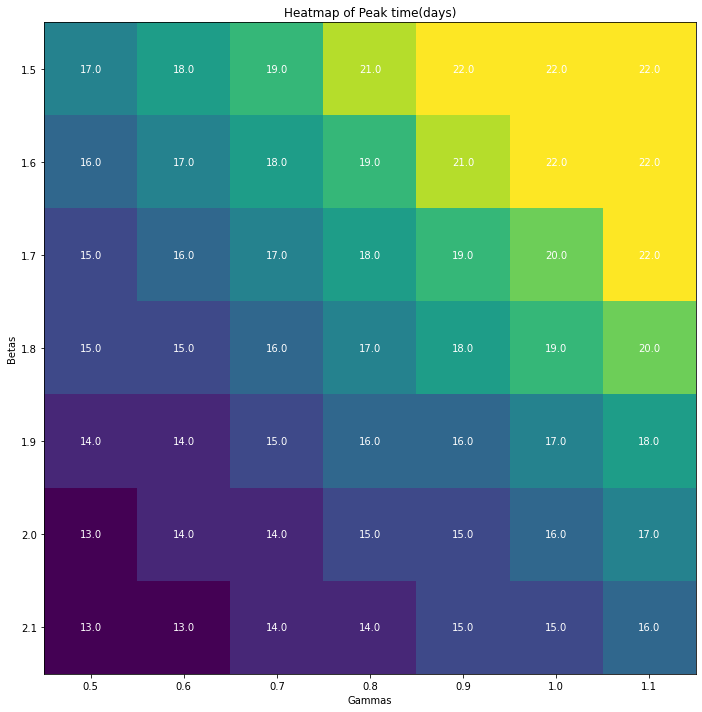

In [10]:
#source: https://matplotlib.org/3.4.3/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(zeros_array)
ax.set_xticks(np.arange(len(gammas)),labels = gammas)
ax.set_yticks(np.arange(len(betas)),labels = betas)
for i in range(len(betas)):
    for j in range(len(gammas)):
        text = ax.text(j, i, zeros_array[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Heatmap of Peak time(days)")
ax.set_xlabel("Gammas")
ax.set_ylabel("Betas")
fig.tight_layout()
plt.show()

#### 3.6 Do the same for the number of individuals infected at peak. (5 points)


In [12]:
def show_peak_p(s0,i0,r0,b,g,Tmax):
  N = s0 + i0 + r0
  si = [s0]
  ii = [i0]
  ti = [0]
  for i in range(0,Tmax):
    ds = -b/N*si[i]*ii[i] 
    di = b/N*si[i]*ii[i] - g*ii[i]
    si.append(si[i] + ds)
    ii.append(ii[i] + di) 
    ti.append(ti[i] + 1)
  return max(ii)



In [13]:
zeros_array2 = np.zeros((len(betas), len(gammas)))
for i in range(len(betas)):
  for j in range(len(gammas)):
    zeros_array2[i,j] = show_peak_p(134000-1, 1, 0, betas[i], gammas[j], 22)

In [14]:
zeros_array2

array([[48874.90840644, 37901.57385748, 28123.85969916, 21019.87531328,
        13801.00239718,  5434.69022171,  1454.28706138],
       [53637.43366278, 42830.98775176, 33173.69472176, 24929.98322364,
        18103.54432965, 12450.20444196,  5208.77616922],
       [57201.22681716, 47318.38141573, 37218.07526017, 28806.58056293,
        21951.79009174, 15794.30694567, 11176.45802998],
       [60020.00781961, 51408.72166688, 41400.78054046, 32061.78156629,
        24816.06120318, 19202.55499747, 14186.25367556],
       [67285.01553173, 53449.38369829, 45877.65978556, 35913.54704559,
        28476.90352271, 22409.86317178, 16766.08389877],
       [68747.73394936, 59082.53154044, 49039.51298847, 40639.77211663,
        31590.40956243, 26033.39152124, 20383.7374323 ],
       [74828.52594135, 63244.58077   , 51386.39628698, 44750.96537002,
        35719.77169461, 29169.92206624, 23683.88061367]])

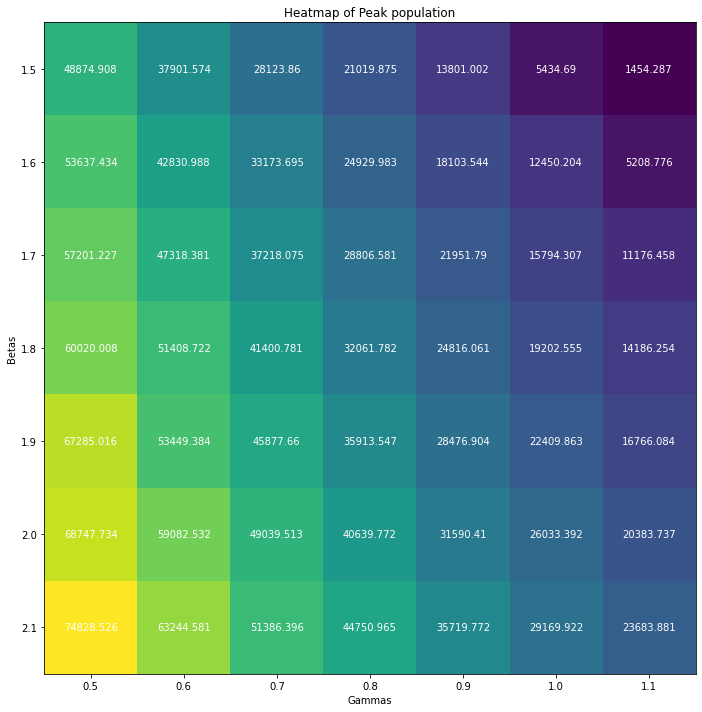

In [15]:
#source: https://matplotlib.org/3.4.3/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(zeros_array2)
ax.set_xticks(np.arange(len(gammas)),labels = gammas)
ax.set_yticks(np.arange(len(betas)),labels = betas)
for i in range(len(betas)):
    for j in range(len(gammas)):
        text = ax.text(j, i, round(zeros_array2[i, j],3),
                       ha="center", va="center", color="w")

ax.set_title("Heatmap of Peak population")
ax.set_xlabel("Gammas")
ax.set_ylabel("Betas")
fig.tight_layout()
plt.show()

### Question 4

#### 4.1 Identify a data set online (5 points) that you find interesting that could potentially be used for the final project; the main requirements is that there needs to be many (hundreds or more) data items with several identifiable variables, at least one of which could be viewed as an output variable that you could predict from the others.


Dataset: Online Payment Fraud Detection
https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection


#### 4.2 Describe the dataset (5 points) Your answer should address (but not be limited to): how many variables? Are the key variables explicitly specified or are they things you would have to derive (e.g. by inferring from text)? Are any of the variables exactly derivable from other variables? (i.e. are any of them redundant?) Are there any variables that could in principle be statistically predicted from other variables? How many rows/data points are there? Is the data in a standard format? If not, how could you convert it to a standard format?


There are a total of 10 variables in the dataset:

step: represents a unit of time where 1 step equals 1 hour; 

type: type of online transaction; 

amount: the amount of the transaction; 

nameOrig: customer starting the transaction; 

oldbalanceOrg: balance before the transaction; 

newbalanceOrig: balance after the transaction; 

nameDest: recipient of the transaction; 

oldbalanceDest: initial balance of recipient before the transaction; 

newbalanceDest: the new balance of recipient after the transaction; 

isFraud: fraud transaction (outcome variable); 

The key elements of this analysis have already been derived. The predictor variable ‘amount’ which represents the transaction amount, is derived from the difference between ‘oldbalanceOrg’ vs. ‘newbalanceOrg’ and ‘oldbalanceDest’ vs. ‘newbalanceDest’, which means they are redundant to each other. I would suggest removing the new balance variables from the dataset. 

The dataset covers a total of 6362620 rows. It does follows a standard data format. 


#### 4.3 Describe the terms of use and identify any key restrictions (e.g. do you have to officially apply to get access to the data? Are there certain types of analyses you can't do?) (5 points) 

Remember: if you can't find explicit permission to use a given dataset, assume that you cannot do so.


The dataset has limited variables. When predicting, the statistical power is not ensured when we do not have insights about how significant the predictors are to the outcome. The dataset is derived online based on historical data that does not have a source of trace. This means that the model would have a limited ability to predict fraud transactions in real-world situations. But on the other hand, given it is derived from public resources, I have full access to the dataset and believe its sample size to be big enough for enough statistical power. 


#### 4.4 Do data exploration on the dataset, and present a representative set of figures that gives insight into the data. Comment on the insights gained. (5 points)


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
data = pd.read_csv("onlinefraud.csv")

In [3]:
data.shape

(6362620, 11)

In [10]:
# data.columns
quant_cols = ['step', 'amount',  'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest']
cat_cols = ['nameDest','type', 'isFraud','isFlaggedFraud']

In [5]:
corr = data[quant_cols].corr()

<AxesSubplot:>

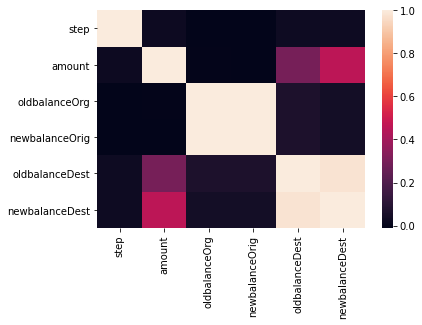

In [6]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<AxesSubplot:>

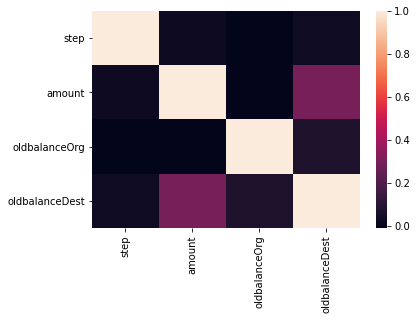

In [6]:
modified_quant = ['step', 'amount',  'oldbalanceOrg', 
       'oldbalanceDest']
corr2 = data[modified_quant].corr()
sns.heatmap(corr2, 
            xticklabels=corr2.columns.values,
            yticklabels=corr2.columns.values)

The correlation looking good now. Next check the distribution of the other quantitative variables.

<AxesSubplot:xlabel='step'>

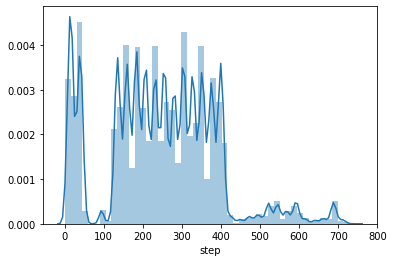

In [7]:
sns.distplot(data['step'])

<AxesSubplot:xlabel='amount'>

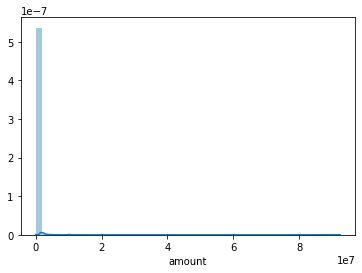

In [8]:
sns.distplot(data['amount'])

<AxesSubplot:xlabel='oldbalanceOrg'>

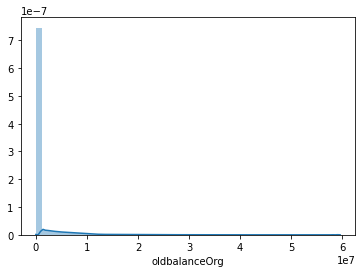

In [11]:
sns.distplot(data['oldbalanceOrg'])

<AxesSubplot:xlabel='oldbalanceDest'>

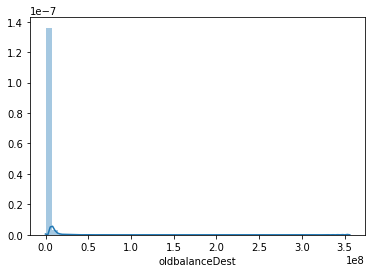

In [12]:
sns.distplot(data['oldbalanceDest'])

In [ ]:
#visualize categorical variables

<AxesSubplot:>

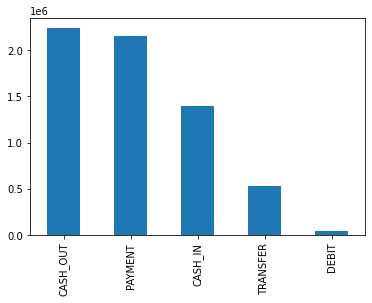

In [13]:
data['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

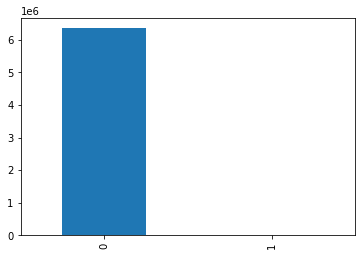

In [14]:
data['isFraud'].value_counts().plot(kind='bar')

In [16]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [17]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

Insights gained:

For quantitative variables, we see that no variables strictly follows a normal distribution, thus we should be considerate when picking statistical algorithm for analysis. The transaction amount and old balances all indicates most the transaction recorded are lower than 0.5e8. For the categorical variables, we can see that the type of transactions have a nonuniform distribution. The fraud transactions are much fewer than the nonfraud transactions, which means our outcome dataset are unbalanced. This could also lead to a bad performance in our model. When evaluating the models, consider balancing the dataset based on outcome variables and observe the performance accordingly. 

#### 4.5 Identify any data cleaning needs (this includes checking for missing data) and write code to perform them. If the data does not need to be cleaned, explain how you reached this conclusion. (5 points)


In [20]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


The data is pretty clean. The only cleaning I will perform is to ditch 'isFlaggedFraud' and 'newbalance;' variables before I do the data analysis. 'isFlaggedFraud' variable does not help with the rest of the analysis and can be used as a comparison base predictions to the expected predictions. 'newbalance' variables contains redundant information about transactions. This would thus also be ditched to prevent redundancy. 